# Домашнее задание №1

In [1]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
import pandas as pd
import scipy.stats as st
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
data = pd.read_csv('s.csv')
data.head(5)

,-6.100000000000000000e+01
0,57.0
1,87.0
2,176.0
3,-56.0
4,-74.0


In [3]:
X = data.values
data = pd.DataFrame(np.append(np.array([float(data.keys().values[0])]), X).reshape(10020,1))
data.head(5) 

,0
0,-61.0
1,57.0
2,87.0
3,176.0
4,-56.0


In [4]:
data.describe()

,0
count,10020.000000
mean,1.032435
std,143.933493
min,-250.000000
25%,-123.000000
50%,0.000000
75%,125.000000
max,250.000000


In [5]:
data.mode()

,0
0,-225.0
1,95.0


In [6]:
X = data.values
#np.array(list(np.array([float(data.keys().values[0])])).append(list(X)))

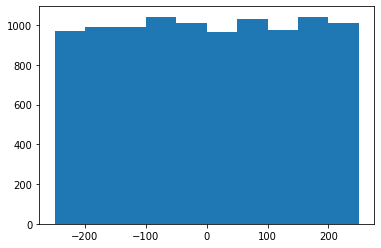

max element = 250.0, min element = -250.0


In [7]:
plt.hist(X)
plt.show()
print('max element = {}, min element = {}'.format(X.max(), X.min()))

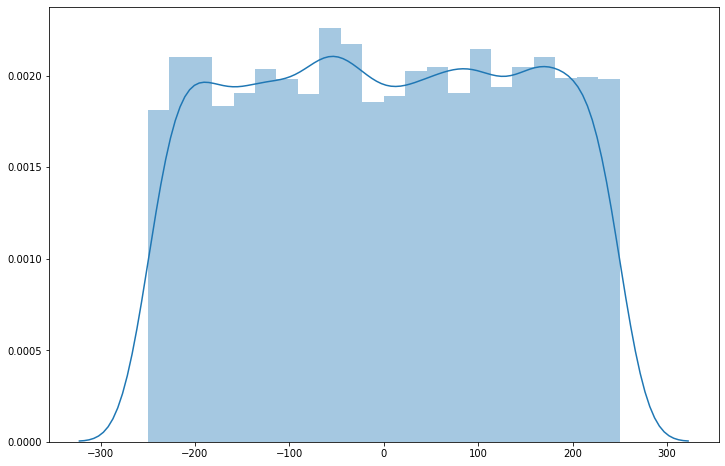

In [8]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
sns.distplot(X)
plt.show()

In [9]:
print('mean = {}'.format(np.mean(X).round(3)))
print('Bias std = {}, Unbias std = {}'.format(np.std(X).round(3), np.std(X, ddof=1).round(3)))

mean = 1.032
Bias std = 143.926, Unbias std = 143.933


In [10]:
print('median = {}'.format(np.median(X[X >= 0])))
print('mode = {}'.format(st.mode(X)))

median = 125.0
mode = ModeResult(mode=array([[-225.]]), count=array([[36]]))


In [11]:
alpha = 0.5
print('q(0.5)={}'.format(np.quantile(X, alpha)))

q(0.5)=0.0


In [12]:
ind = np.where(st.rankdata(X, method = 'ordinal') == 42)[0]
print('rank(42)={}'.format(X[ind]))

rank(42)=[[-249.]]


### Что нужно найти:
1. Среднее (__mean__)
2. Медиана (__median__)
3. Дисперсия (несмещенная оценка) (__unbiased std__)
4. Медиана для неотрицательных значений (__median for non-negative values__)
5. Мода (__mode__)
6. Число мод (__number of modes__)
7. Порядковая статистика с номером 42 (__the 42-th order statistic__)

In [14]:
print('1. mean = {}'.format( np.mean(X).round(3) ))
print('2. median = {}'.format( np.median(X).round(3) ))
print('3. unbiased std = {}'.format( np.std(X, ddof=1).round(3) ))
print('4. median for non-negative values= {}'.format( np.median(X[X >= 0]) ))
print('5. mode = {}'.format( st.mode(X)[0][0][0] ))
print('6. number of mode = {}'.format(data.mode().values.shape[0]))
print('7. the 42-th order statistic = {}'.format( X[np.where(st.rankdata(X, method = 'ordinal') == 42)[0]][0][0]))

1. mean = 1.032
2. median = 0.0
3. unbiased std = 143.933
4. median for non-negative values= 125.0
5. mode = -225.0
6. number of mode = 2
7. the 42-th order statistic = -249.0


### Черновик (как посчитать количество мод?)

In [16]:
from collections import Counter
dic = Counter(X.reshape(10020,))
max_value = max(dic.values())  
max_keys = [k for k, v in dic.items() if v == max_value]
print('modes are {1}; number of modes is {2};'.format(max_value, max_keys, len(max_keys)))

modes are [95.0, -225.0]; number of modes is 2;
